In [1]:
from sklearn.metrics import classification_report
import suport.patchesMethods as pm
import cv2
import numpy as np


In [ ]:
sample_path="tgs_salt/0a1742c740.png"
mask_path  ="tgs_salt/0a1742c740Mask.png"

original = cv2.imread(sample_path)
mask = cv2.imread(mask_path,0)

images = [original,mask]
titles = ["Seismic Image","Mask"]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 

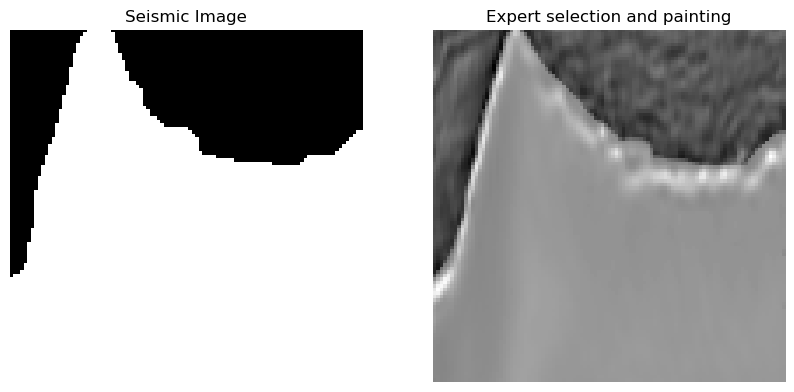

In [3]:
sample_path=r"expertAnalyses\border1.png"
mask_path  =r"expertAnalyses\border1_expert_yellow.png"

original = cv2.imread(sample_path)
mask = cv2.imread(mask_path,0)

images = [original,mask]
titles = ["Seismic Image","Expert selection and painting"]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 

In [4]:


def compare_images(imageA, imageB):
    # Flatten the images into 1D arrays
    imageA = imageA.flatten()
    imageB = imageB.flatten()

    # Generate the classification report
    report = classification_report(imageA, imageB, output_dict=True)

    return report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score']

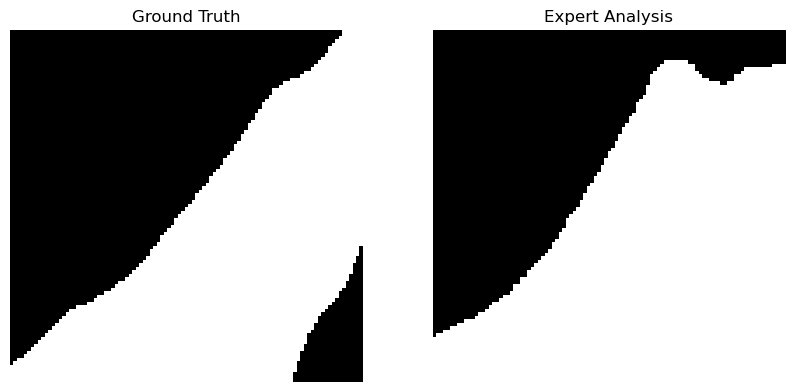

Precision: , Recall: , F1-score: 
0.88, 0.87,  0.87


In [5]:
# Load your images
image = "0c02f95a08"
mask   ="tgs_salt/"+image+"Mask.png"
expert  ="tgs_salt/"+image+"claudio.png"

imageA = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
imageB = cv2.imread(expert, cv2.IMREAD_GRAYSCALE)

imageA = np.where(imageA > 0, 1, 0)
imageB = np.where(imageB > 0, 1, 0)

#show the images
images = [imageA,imageB]
titles = ["Ground Truth","Expert Analysis"]
pm.showImages(images=images, imagesTitle=titles,size=(10,10))

precision, recall, f1_score = compare_images(imageA, imageB)
precision = "{:.2f}".format(precision)
recall = "{:.2f}".format(recall)
f1_score = "{:.2f}".format(f1_score)
# Replace the dot with a comma

print(f"Precision: , Recall: , F1-score: ")
print(f"{precision}, {recall},  {f1_score}")